# <center>Введение</center>

К обучению без учителя можно отнести:

* **Методы кластеризации**. Они позволяют разделить объекты на группы, внутри которых объекты максимально похожи друг на друга.

* **Методы понижения размерности**. С их помощью можно уменьшить число признаков, которые характеризуют объект. Обычно количество признаков уменьшают до двух-трёх для дальнейшей визуализации данных или использования при обучении моделей.

* **Методы ассоциации**. Они используются для того, чтобы найти правила и законы, по которым существует последовательность действий.

# <center>Базовая кластеризация</center> 

Кластеризация позволяет разбить объекты на группы, которые называются **кластерами**.

**Центроид** — это центр масс кластера, или среднее значение координат объектов кластера. Для нахождения центроида мы берём все значения по оси *x* и считаем среднее.

## <center>Алгоритм k-means</center>

**Идея алгоритма** состоит в том, что он разбивает множество элементов векторного пространства на заранее заданное пользователем число кластеров, а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.

Математически это выглядит следующим образом: 

$$V = \sum_{i=1}^{k} \sum_{x\in S_{i}} (x - \mu_{i})^2$$

Мы итерируемся по каждому кластеру и для всех векторов $x$ внутри кластера $S_{i}$ подсчитываем центроиды ($\mu_{i}$). Далее рассчитываем разницу между каждым вектором $x$ кластера $S_{i}$ и центроидом кластера $S_{i}$. Необходимо, чтобы это значение, возведённое в квадрат ($V$), было минимальным для каждого кластера.

Алгоритм *k-means* состоит из девяти шагов:

1) Решаем, на сколько кластеров хотим разделить данные.

2) Чтобы сформировать кластеры, случайным образом выбираем три объекта из датасета. Эти три объекта будут представлять три разных кластера (жёлтый, розовый и зелёный). Так как в этих кластерах находится по одному объекту, то эти объекты будут считаться исходными центроидами кластеров.

3) Распределим оставшиеся объекты датасета по трём кластерам. (Считается, что объект принадлежит к тому кластеру, к центроиду которого он находится ближе всего.)

4) Теперь в каждом из кластеров больше одного объекта, и центр этих кластеров тоже изменился. Поэтому рассчитаем новые центроиды.

5) После этого для каждого объекта в выборке повторяем шаг 3, т. е. для каждого объекта датасета рассчитываем расстояние до центроидов. Так как у нас новые кластеры, центроиды могли сильно измениться. Поэтому при подсчёте расстояний ближайшим к объекту может оказаться уже другой центроид. Значит, этот объект будет принадлежать к другому кластеру.

6) Шаг 5 повторяется до тех пор, пока объекты датасета не перестанут менять кластеры, к которым они относятся. Как только объекты перестают это делать, алгоритм завершается и мы переходим к шагу 7.

7) Далее для каждого кластера подсчитаем средний квадрат расстояния от объектов до центров их кластеров. Находим суммарное отклонение.

8) Далее мы несколько раз заново запускаем алгоритм кластеризации, начиная с шага 2. В шаге 1 мы выбирали первые объекты кластера случайным образом, но так можно выбрать не разные объекты, а те, что находятся рядом. В таком случае кластеризация получится некачественной. Чтобы такого не происходило, мы повторяем весь алгоритм несколько раз, начиная с шага 2. В *sklearn* по умолчанию проводится десять итераций.

9) Среди получившихся кластеров нам необходимо найти наилучший вариант кластеризации. Лучшей будет признана кластеризация с минимальным значением среднеквадратичного отклонения, которое рассчитывали на шаге 7.

Очевидно, что если все объекты будут в одном кластере, это будет худший сценарий с максимальным среднеквадратичным отклонением. 

А если каждый объект будет принадлежать собственному кластеру, отклонение будет нулевым, так как один объект будет являться и объектом кластера, и его центром масс, а значит расстояние между объектом кластера и центроидом кластера равно нулю. Такое разбиение будет считаться переобучением, так как мы слишком подстраиваемся под данные.

|Название|Принцип работы|
|--------|--------------|
|K-MEANS|Находит центроиды кластера как среднее значение координат.|
|K-MEANS++|В классическом алгоритме *k-means* центроиды выбираются случайно, но это может приводить к тому, что два объекта, которые находятся близко друг к другу, будут центроидами двух разных кластеров — это будет приводить к долгой работе алгоритма.Алгоритм *k-means++* чуть «хитрее» и выбирает центроиды кластеров не совсем случайно.|
|K-MEDIANS|На этапе поиска центроидов кластера находит не среднее значение координат, а медиану.|
|K-MEDOIDS|Работает так же, как *k-medians*, но медианой кластера будет не какая-то точка в кластере, а объект, который находится ближе всего к этим координатам медианы кластера.|
|FUZZY C-MEANS|Данный алгоритм разрешает нечётко присваивать кластеры. Каждый объект может принадлежать к разным кластерам с разной вероятностью.|

Для того чтобы запустить алгоритм кластеризации *k-means*, нам нужна библиотека `sklearn` и модуль `KMeans`.

**Что необходимо для запуска:**

* Обязательно задать количество кластеров, на которые необходимо разделить данные.

* Данные, т. е. параметры объектов ($x_{i}$), которые мы будем передавать в виде матрицы наблюдений *X*.

```python
# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = df[["x1", "x2", "x3"]]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_
```

Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из `df2`, то мы просто воспользуемся методом `predict`:

```python
X_new = df2[["x1", "x2", "x3"]]
k_means.predict(X_new)
```

Чтобы запустить алгоритм, необходимо задать **параметры кластеризации**:

* `n_clusters` — количество кластеров. По умолчанию — 8.

* `init` — способ инициализации центроидов. Есть две опции: `random` (выбирает центроиды случайным образом) и `k-means++` (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется `k-means++`.

* `n_init` — количество случайных инициализаций алгоритма `k-means`. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия `k-means`. По умолчанию `n_init = 10`.

* `max_iter` — максимальное количество итераций алгоритма `k-means` при одном запуске. По умолчанию — 300.

* `random_state` — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

> *P.S. смотри блоктон "extra_1", часть 1*

## <center>Недостатки алгоритма k-means</center>

* Необходимо заранее знать, на сколько кластеров мы хотим разделить данные.

* Очевидно, что для объектов, которые в равной степени принадлежат к разным кластерам, алгоритм *k-means* будет отрабатывать плохо.

* Алгоритм чувствителен к выбросам в данных, так как выбросы сильно искажают местонахождение центроида кластера.

* Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы.

* Так как в самом начале работы алгоритма центроиды определяются случайным образом, результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров.

## <center>Определение оптимального k для алгоритма k-means</center>

Для этого можно использовать несколько способов: **метод локтя (elbow plot)**, **статистику разрыва (Gap Statistic Method)**, **коэффициент силуэта (Average Silhouette Method)**.

Начнём с **метода локтя**.

Данный метод позволяет найти такое оптимальное число кластеров, чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных.

Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется **недообученной (underfitting)**.

Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется **переобученной (overfitting)**.

Чтобы определить оптимальное количество кластеров, используя метод локтя, необходимо нарисовать график, на котором по оси *x* будет отложено количество кластеров, а по оси *y* — инерция.

**Инерция** — это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера. Когда инерция быстро снижается, область считается недообученной, а далее, после «перегиба», идёт очень медленное снижение инерции, и область считается переобученной.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_19.png)

Теперь реализуем это в виде кода. Нам нужно посчитать значение инерции для кластеризаций с разным количеством кластеров. Для этого напишем функцию `get_inertia`, которая будет принимать данные и количество кластеров и возвращать значение инерции:

```python
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
```

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_20.png)

Таким образом, метод локтя — это довольно простой метод, основанный на учёте евклидова расстояния между объектами кластера и центроидами.

Однако изгиб на графике также может быть представлен нечётко. Если вдруг в ходе работы вы встречаете график, на котором невозможно найти «локоть», на помощь придёт **коэффициент силуэта**.

График силуэта, в отличие от графика локтя, имеет пиковый характер, поэтому его проще визуализировать и анализировать.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_34.png)

**Коэффициент силуэта** показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров.

Силуэт варьируется от -1 до +1: чем выше значение, тем больше объекты похожи на объекты своего кластера и меньше похожи на объекты соседних кластеров.

Если силуэт равен 1, это означает, что кластеры хорошо разделены между собой и имеют высокую плотность внутри себя, например, такая кластеризация, где данные чётко разделены на группы.

На графике для метода силуэта отчётливо виден пик с наибольшим значением коэффициента силуэта. Значит, оптимальное количество кластеров равно 3.

Посчитаем силуэт, используя *sklearn*:

```python
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")
```

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_24.png)

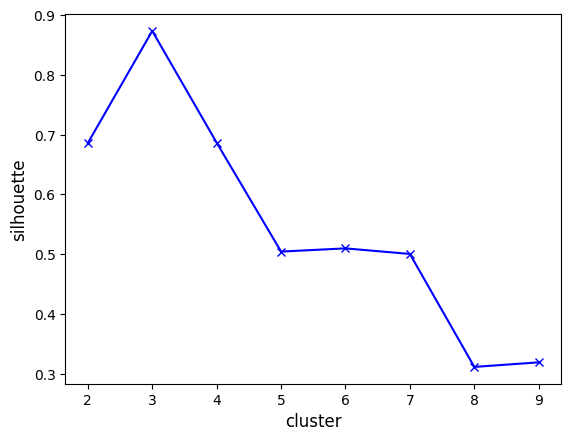

In [6]:
# Задание 2.7

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

instr_df = pd.read_csv("data/values_from_the_instrument.csv")

def get_silhouette(cluster_num, df):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(df)
    silhouette = silhouette_score(df, k_means.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(2, 10):
    silhouettes.append(get_silhouette(i ,instr_df))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-')

## <center>Метрики</center>

Кластеризация относится к методу машинного обучения без учителя и применяется, когда нет размеченных данных, а значит мы не знаем правильных ответов. Однако иногда размеченные данные всё же есть. Существует ряд метрик, которые можно подсчитать, **если данные размечены**.

**1) Однородность кластеров (homogeneity score)**

Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру. Значение метрики уменьшается, если объединить два разных кластера, которые содержат непохожие объекты.

В первом случае ответы модели будут полностью совпадать с истинными ответами, а во втором будут полностью противоположны им:

In [8]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))

1.0
1.0


Во втором случае мы получаем метрику, равную 1, хотя предсказывали совершенно противоположный результат. Почему так получилось?

Вы можете удивиться, что во втором случае метрика равна 1, но это нормально: хоть мы и разделили данные на большее количество кластеров, внутри кластеров данные остались однородными.

**2) Полнота кластера (completeness score)**

Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере.

Значение метрики уменьшается, если эталонный кластер разделить на части. Например, если кластер, в котором находятся только собаки, разделить на два более мелких кластера, то метрика полноты у такой кластеризации будет меньше.

При максимальном заполнении кластеров схожими объектами полнота равняется 1 (когда есть один большой кластер со всеми собаками), при минимальном заполнении — 0.

In [9]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])

1.0

**3) V-мера (V-Measure)**

Эта метрика — комбинация метрик полноты и однородности.

Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

V-мера рассчитывается по формуле:

$$v = \frac{(1 + \beta) \times homogeneity \times completeness}{(\beta \times homogeneity + completeness)}$$

По умолчанию $\beta=1$, но это значение можно варьировать, если хочется дать разный вес разным свойствам.

* Если однородность кластеров важнее, чем их полнота, следует указать значение $\beta < 1$. Тогда значение $\beta \times homogeneity$ в знаменателе получится небольшим и тем самым будет сильнее влиять на значение $v$. Чем меньше $\beta \times homogeneity$, тем выше $v$.

* Если однородность кластеров не особо важна, но важно, чтобы каждый кластер содержал максимальное количество похожих объектов, тогда мы регулируем значение $\beta$ так, чтобы $\beta > 1$.

> Данную метрику можно сравнить с метрикой *F-меры*. Данную метрику можно вычислять, когда одновременно важны и наполненность кластеров, и их однородность.

> Метрику однородности кластера при кластеризации можно сравнить с метрикой *precision* из задачи классификации: метрика однородности также показывает, насколько точно мы предсказали, к какому классу принадлежит объект. Метрика полноты так же, как метрика *recall* из задачи классификации, показывает, насколько мы наполнили кластеры теми объектами, которые должны принадлежать к данным кластерам.

```python
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
>1.0

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
>0.9070246789753754
```

**4) Индекс Рэнда**

Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (*number of agreeing pairs*), среди предсказанных и размеченных данных.

$$Rand \ Index = \frac{number \ of \ agreeing \ pairs}{number \ of \ pairs}$$

* $number \ of \ pairs$ - общее количество пар,

* $number \ of \ agreeing \ pairs$ - количество пар, для которых предсказание и истинные значения совпали.

По сути, данная метрика подсчитывает, для какой доли объектов датасета мы правильно определили кластер.

In [10]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

In [11]:
# Задание 3.3

from sklearn.metrics.cluster import homogeneity_score
round(homogeneity_score(labels_true =[1,2,2,1,0], labels_pred=[1,0,2,1,2]), 2)

0.74

# <center>Иерархическая кластеризация</center>

Принцип иерархической кластеризации основан на построении дерева (иерархии) вложенных кластеров.

При иерархической кластеризации строится дендрограмма. Её можно сравнить с древом языков мира, на котором языки объединяются в различные семьи, укрупняясь и образуя всё более обширные языковые ветви.

**Дендрограмма**  — это древовидная диаграмма, которая содержит $n$ уровней. Каждый уровень — это шаг укрупнения кластеров.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_2.png)

Чем больше схожесть между двумя объектами на дендрограмме, тем ниже высота внутренней ветки, которая идёт из объекта или кластера.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_3.png)

На дендрограмме выше Сельма и Пэтти Бувье, сёстры Мардж Симпсон, похожи друг на друга, поэтому высота соединяющей их внутренней ветки маленькая, а сама Мардж не похожа на своих сестёр, поэтому высота внутренней ветки гораздо больше.

Если ещё раз посмотреть на график с дендрограммой ирисов, можно сказать, что при кластеризации мы можем пойти снизу вверх (от листьев к корню) или сверху вниз (от корня к листьям). И действительно — при иерархической кластеризации выделяют два подхода: **агломеративный** и **дивизионный**. В первом случае кластеры образуются снизу вверх, т. е. при объединении кластеров, а во втором — сверху вниз, в ходе деления крупных кластеров:

**1) Дивизионный (дивизивный) метод (divisive)**

Кластеры создаются при делении крупных кластеров:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_7.png)

**2) Агломеративный метод (agglomerative)**

Новые кластеры создаются в ходе объединения более мелких кластеров:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_6.png)

Для того чтобы построить дендрограмму, нужна **матрица сходства**, построенная на основе расстояний между кластерами.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_8.png)

**$K$** — это мера сходства между двумя кластерами. По диагонали в матрице записаны единицы, так как объекты максимально похожи на самих себя.

Чтобы рассчитать данную матрицу, нужно знать расстояния между двумя кластерами. Существуют разные подходы его вычисления, и выбранный подход влияет на результат кластеризации.

**<u>Методы определения расстояния между кластерами:</u>**

**1) Метод одиночной связи (single linkage)**

Поиск минимального расстояния между объектами из разных кластеров.

**2) Метод полной связи (complete (maximum) linkage)**

Поиск максимального расстояния между объектами из разных кластеров.

**3) Метод средней связи (pair group method using arithmetic mean)**

Расстояние между двумя кластерами считается как среднее от расстояния между двумя элементами этих кластеров.

**4) Центроидный метод (centroid)**

Расстояния между кластерами рассчитываются как расстояния между центроидами этих кластеров.

**5) Метод Уорда (Ward's linkage, Minimal Increase of Sum-of-Squares (MISSQ))**

Расстояние рассчитывается как сумма квадратов разностей между точками кластеров. По сути, это подход, в котором мы минимизируем дисперсию в кластере, и в этом смысле он аналогичен методу *k-средних*, но реализуется с помощью иерархического подхода. Используется в *sklearn* по умолчанию.

*Метод одиночной связи* но очень плохо справляется с вытянутыми и перекрывающимися данными. 

Использование *методов средней связи и полной связи* приносит хорошие результаты только при условии, что данные имеют высокую плотность и не пересекаются, или же для однородно распределённых данных. В остальных случаях они отрабатывают плохо.

**<u>Задачи где используется иерархическая кластеризация:</u>**

* Для построения филогенетического дерева.

* Для анализа текстов.

Базовые параметры, которые необходимо передать в `AgglomerativeClustering`:

* `n_clusters` — количество кластеров; по умолчанию — 2.

* `linkage` — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать `single`, `ward`, `average`, `complete`; по умолчанию используется `ward`.

```python
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
agglomerative_clustering.fit(X)
agglomerative_clustering.labels_
```

# <center>EM-алгоритмы кластеризации</center>

В основе данного подхода лежит предположение, что любой объект принадлежит ко всем кластерам, но с разной вероятностью.

Один из примеров *EM (Expectation-maximization)-алгоритма* — это *k-means-кластеризация*.